Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Read CSV Files

In [3]:
df = pd.read_csv("taxi_trip_pricing.csv")
print(df.head())
df.info()

   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3                 11

Missing Value Inspection

In [4]:
df.isnull().sum()


Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

Missing value Manipulation

In [6]:
med_val = df['Trip_Distance_km'].median()
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(med_val)
df.isnull().sum()

mode_val = df['Time_of_Day'].mode()[0]
df['Time_of_Day'] = df['Time_of_Day'].fillna(mode_val)

mode_val = df['Day_of_Week'].mode()[0]
df['Day_of_Week'] = df['Day_of_Week'].fillna(mode_val)

med_val = df['Passenger_Count'].median()
df['Passenger_Count'] = df['Passenger_Count'].fillna(med_val)
df.isnull().sum()

mode_val = df['Traffic_Conditions'].mode()[0]
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna(mode_val)

mode_val = df['Weather'].mode()[0]
df['Weather'] = df['Weather'].fillna(mode_val)

med_val = df['Base_Fare'].median()
df['Base_Fare'] = df['Base_Fare'].fillna(med_val)
df.isnull().sum()

med_val = df['Per_Km_Rate'].median()
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(med_val)
df.isnull().sum()

med_val = df['Per_Minute_Rate'].median()
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(med_val)
df.isnull().sum()

med_val = df['Trip_Duration_Minutes'].median()
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(med_val)
df.isnull().sum()

med_val = df['Trip_Price'].median()
df['Trip_Price'] = df['Trip_Price'].fillna(med_val)
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

Copying the df into a new dataframe called 'df_copy'

In [7]:
df_copy = df.copy()

Mapping

Time_of_Day

In [8]:
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    421
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [9]:
Time_of_Day_mapping = {
    'Afternoon':1,
    'Morning':2,
    'Evening':3,
    'Night':4,
}
df['Time_of_Day'] = df['Time_of_Day'].map(Time_of_Day_mapping)


Day_of_Week


In [10]:
df['Day_of_Week'].value_counts()

Day_of_Week
Weekday    705
Weekend    295
Name: count, dtype: int64

In [11]:
Day_of_Week_mapping = {
    'Weekday':1,
    'Weekend':0,
}
df['Day_of_Week'] = df['Day_of_Week'].map(Day_of_Week_mapping)

Traffic Condition

In [12]:
df['Traffic_Conditions'].value_counts()

Traffic_Conditions
Low       447
Medium    371
High      182
Name: count, dtype: int64

In [13]:
Traffic_Conditions_mapping = {
    'Low':1,
    'Medium':2,
    'High':3,
}
df['Traffic_Conditions'] = df['Traffic_Conditions'].map(Traffic_Conditions_mapping)

Weather

In [14]:
df['Weather'].value_counts()

Weather
Clear    717
Rain     227
Snow      56
Name: count, dtype: int64

In [15]:
Weather_mapping = {
    'Clear':1,
    'Rain':2,
    'Snow':3,
}
df['Weather'] = df['Weather'].map(Weather_mapping)

Detail

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   int64  
 2   Day_of_Week            1000 non-null   int64  
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   int64  
 5   Weather                1000 non-null   int64  
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 86.1 KB


Correlation of the Model

In [17]:
correlation = df.corr()
correlation

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.017795,0.021809,-0.045072,0.094591,0.017417,0.031812,-0.015398,-0.025494,-0.020963,0.830479
Time_of_Day,-0.017795,1.000000,0.001231,0.036704,0.048979,0.030865,0.023869,0.082278,0.021533,-0.023991,-0.013864
Day_of_Week,0.021809,0.001231,1.000000,-0.021068,0.011220,-0.026458,0.032782,0.040856,-0.000250,-0.001451,0.028516
Passenger_Count,-0.045072,0.036704,-0.021068,1.000000,-0.003664,0.013484,0.019717,0.025258,0.028360,0.024868,-0.012468
Traffic_Conditions,0.094591,0.048979,0.011220,-0.003664,1.000000,-0.016534,0.027787,-0.057022,-0.027870,-0.003813,0.067425
Weather,0.017417,0.030865,-0.026458,0.013484,-0.016534,1.000000,-0.032033,0.042974,-0.021278,0.017063,0.032919
Base_Fare,0.031812,0.023869,0.032782,0.019717,0.027787,-0.032033,1.000000,0.002975,-0.018047,0.011585,0.033103
Per_Km_Rate,-0.015398,0.082278,0.040856,0.025258,-0.057022,0.042974,0.002975,1.000000,0.027585,0.025636,0.256122
Per_Minute_Rate,-0.025494,0.021533,-0.000250,0.028360,-0.027870,-0.021278,-0.018047,0.027585,1.000000,-0.022913,0.131534
Trip_Duration_Minutes,-0.020963,-0.023991,-0.001451,0.024868,-0.003813,0.017063,0.011585,0.025636,-0.022913,1.000000,0.214669


Correlation Matrix

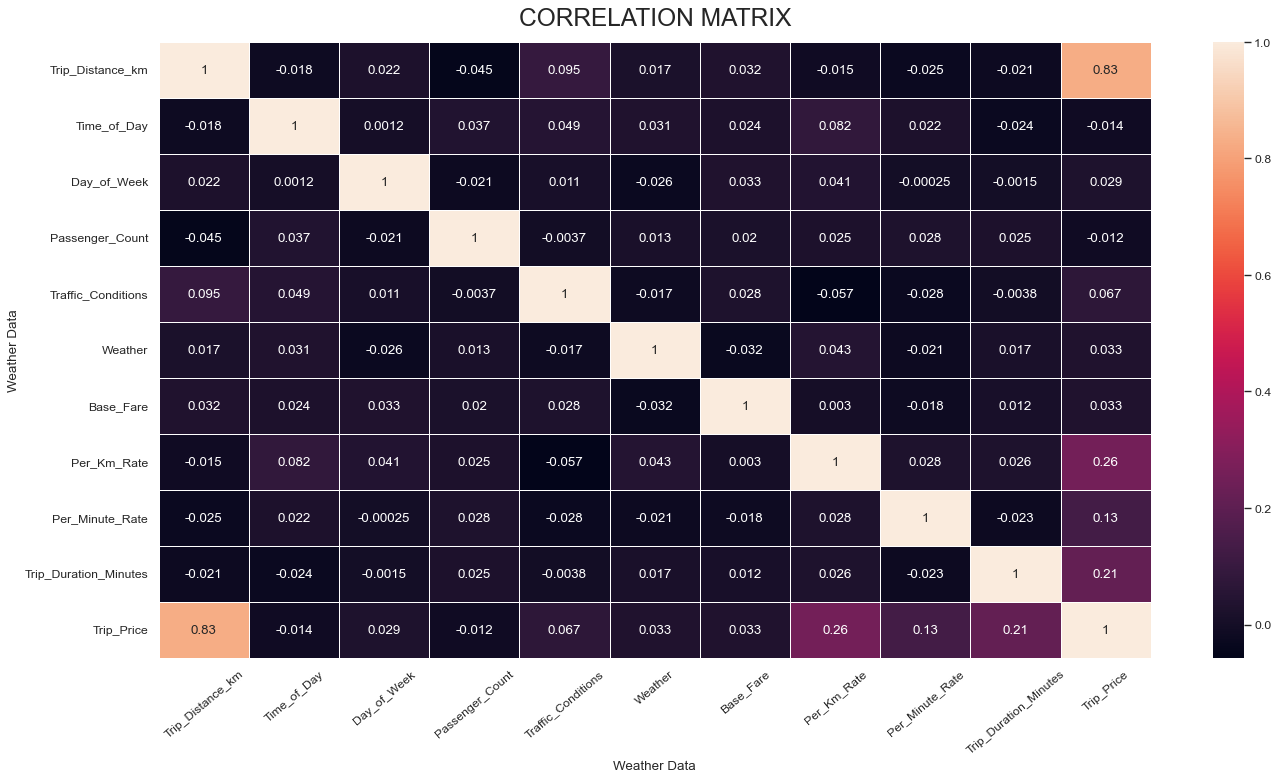

In [18]:
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(correlation, linecolor='white', linewidths=0.5, annot=True)
plt.title('Correlation Matrix'.upper(), size=22, pad=15)
plt.xlabel('Weather Data')
plt.ylabel('Weather Data')
plt.xticks(rotation=40)
plt.show()

Pie-Chart

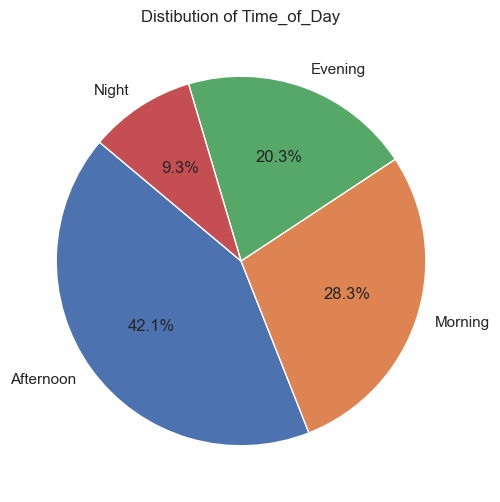

In [19]:
Time_of_Day_counts = df_copy['Time_of_Day'].value_counts()
Time_of_Day_counts

plt.figure(figsize=(6,6))
plt.pie(Time_of_Day_counts, labels=Time_of_Day_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distibution of Time_of_Day')
plt.show()

CountPlot

C:\Users\Ryhan Munna\AppData\Local\Temp\ipykernel_11596\4020504206.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Passenger_Count', data=df_copy, palette = 'viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

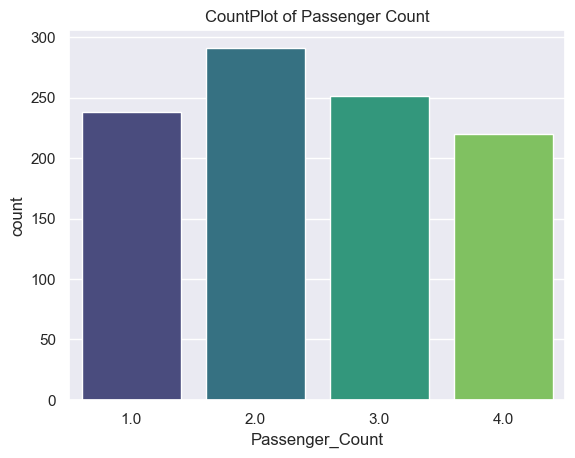

In [20]:
sns.countplot(x='Passenger_Count', data=df_copy, palette = 'viridis')
plt.title('CountPlot of Passenger Count')
plt.show

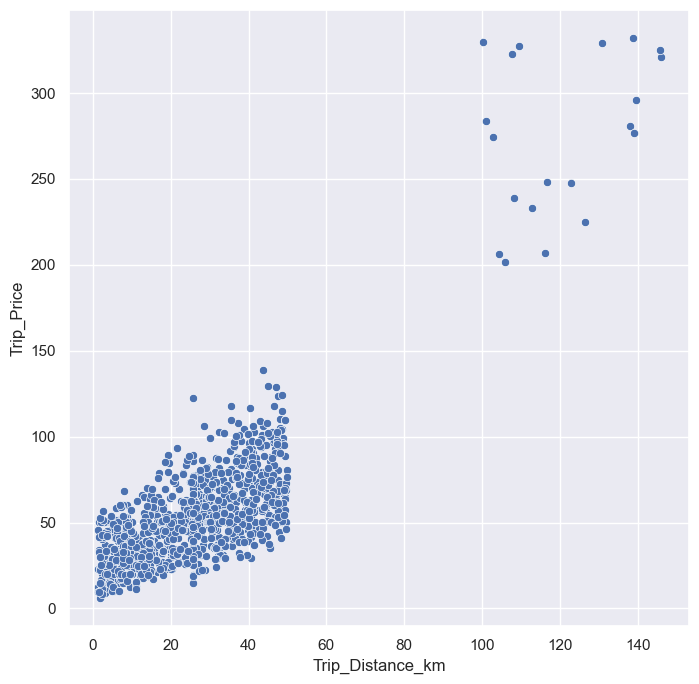

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Trip_Distance_km", y="Trip_Price", data=df_copy)
plt.show()

Linear Regression

In [24]:
from sklearn.model_selection import train_test_split

Fitting X and Y 

In [26]:
X=df.drop(columns=['Trip_Price'])
Y=df['Trip_Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [77]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
29               3.28            3            1              2.0   
535             47.29            2            0              1.0   
695             30.92            2            1              4.0   
557              2.41            1            1              2.0   
836             45.83            2            0              3.0   
..                ...          ...          ...              ...   
106             21.11            1            0              4.0   
270             40.66            1            1              2.0   
860             39.00            3            0              1.0   
435             35.35            2            1              1.0   
102             16.40            3            1              1.0   

     Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
29                    2        1       2.88         1.76             0.20   
535                   3      

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Performance Test for Linear Regression

In [30]:
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print('MAE Linear Regression: ', lr_mae)
print('MSE Linear Regression: ', lr_mse)
print('RMSE Linear Regression: ', lr_rmse)

MAE Linear Regression:  9.869196279929023
MSE Linear Regression:  191.62808455244746
RMSE Linear Regression:  13.842979612512888


Polynomial Regression

In [32]:
X=df.drop(columns=['Trip_Price'])
Y=df['Trip_Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [36]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [37]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

Performance for Polynomial Regression

In [39]:
poly_mae = mean_absolute_error(y_test, lr_pred)
poly_mse = mean_squared_error(y_test, lr_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print('Polynomial MAE Linear Regression: ', poly_mae)
print('Polynomial MSE Linear Regression: ', poly_mse)
print('Polynomial RMSE Linear Regression: ', poly_rmse)

Polynomial MAE Linear Regression:  9.869196279929023
Polynomial MSE Linear Regression:  191.62808455244746
Polynomial RMSE Linear Regression:  13.842979612512888
